In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
import time

In [105]:
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [109]:
start_t = time.time()
model = RandomForestClassifier(n_estimators=100, max_depth=7)
model.fit(X_train, y_train)

end_t = time.time()

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Training time:", end_t - start_t)

Accuracy: 0.7489177489177489
Training time: 0.10564875602722168


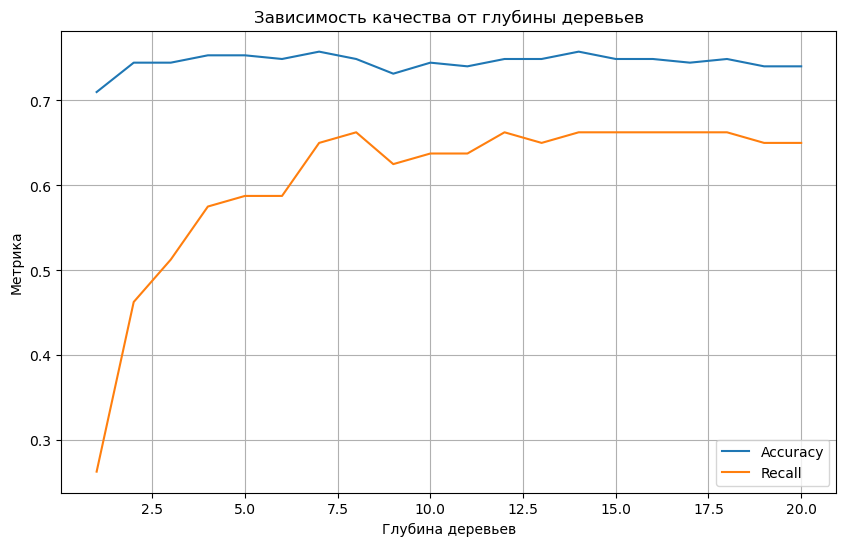

In [19]:
depths = range(1, 21)
accuracy_scores = []
recall_scores = []

for depth in depths:
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))


plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_scores, label='Accuracy', marker='o')
plt.plot(depths, recall_scores, label='Recall', marker='s')
plt.xlabel('Глубина деревьев (max_depth)')
plt.ylabel('Метрика')
plt.title('Зависимость качества от глубины деревьев')
plt.legend()
plt.grid()
plt.show()

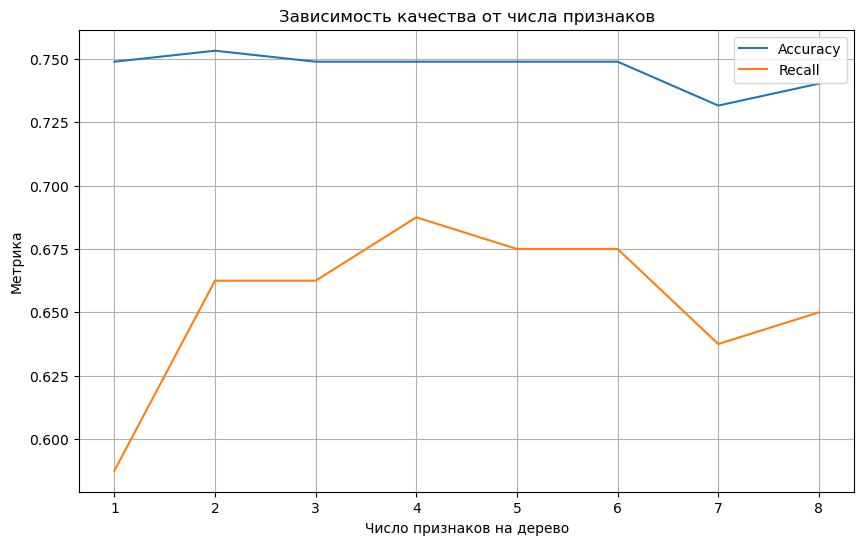

In [15]:
features = range(1, X.shape[1] + 1)
accuracy_scores = []
recall_scores = []

for n_features in features:
    model = RandomForestClassifier(
        n_estimators=100,
        max_features=n_features,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(features, accuracy_scores, label='Accuracy')
plt.plot(features, recall_scores, label='Recall')
plt.xlabel('Число признаков на дерево')
plt.ylabel('Метрика')
plt.title('Зависимость качества от числа признаков')
plt.xticks(features)
plt.legend()
plt.grid()
plt.show()

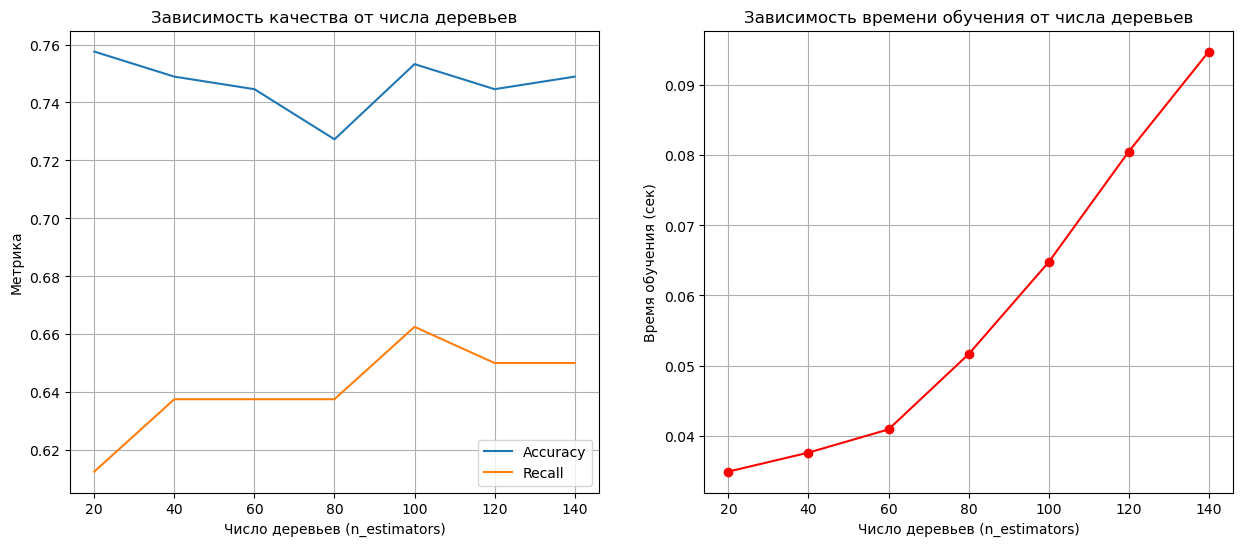

In [27]:
n_trees = [20, 40, 60,80, 100, 120, 140]
accuracy_scores = []
recall_scores = []
training_times = []

for n in n_trees:
    start_time = time.time()
    model = RandomForestClassifier(
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)
    training_times.append(time.time() - start_time)
    
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(n_trees, accuracy_scores, label='Accuracy')
ax1.plot(n_trees, recall_scores, label='Recall')
ax1.set_xlabel('Число деревьев (n_estimators)')
ax1.set_ylabel('Метрика')
ax1.set_title('Зависимость качества от числа деревьев')
ax1.legend()
ax1.grid()

ax2.plot(n_trees, training_times, marker='o', color='red')
ax2.set_xlabel('Число деревьев (n_estimators)')
ax2.set_ylabel('Время обучения (сек)')
ax2.set_title('Зависимость времени обучения от числа деревьев')
ax2.grid()

plt.show()

In [29]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 797.0 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
from xgboost import XGBClassifier

In [117]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

start_time = time.time()
model = xgb.XGBClassifier(
    n_estimators=100, 
    max_depth=8,
    random_state=42,
    learning_rate=0.06, 
    subsample=1,  
    gamma=1, 
    reg_alpha=0, 
    reg_lambda=200
)
model.fit(X_train, y_train)
end_time = time.time()

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Training time:", end_time - start_time)

Accuracy: 0.7445887445887446
Training time: 0.05545496940612793
